# Introduction


Sentiment analysis is a key application in natural language processing, allowing us to interpret and classify the emotions expressed in text. With the abundance of user-generated content today, understanding public sentiment has become increasingly important for businesses, researchers, and policymakers. This project focuses on applying sentiment analysis to the IMDb dataset, a widely-used benchmark, to determine whether movie reviews are positive or negative.

We developed a deep learning model using embedding layers to capture the relationships between words, followed by dense layers to perform the classification. The project began with data exploration and preprocessing to ensure the input was well-suited for the model. Our objective was to build a model that accurately classifies sentiment while maintaining a balance between complexity and efficiency, avoiding overfitting through dropout regularization.

Through this project, we demonstrated the effectiveness of a straightforward neural network approach in sentiment analysis, providing insights into model performance through visualizations and identifying key areas for potential improvement. The results highlight the strengths of our approach in handling real-world text data, paving the way for further refinement and application.

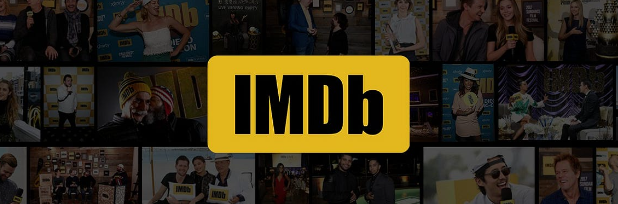

## Python Libraries & Dataset Check

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Activation  # Fixed import

# Load the dataset
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(
    num_words=10000,    # Keep only the top 10,000 most frequent words
    skip_top=20,        # Skip the top 20 most frequent words
    maxlen=None,        # Do not truncate any review
    seed=113,           # Random seed for reproducibility
    start_char=1,       # Start character for each review
    oov_char=2,         # Character for out-of-vocabulary words
    index_from=3        # Indexing offset for the word indices
)

# Check the shapes of the data
print("X_train shape:", np.shape(X_train))
print("Y_train shape:", np.shape(Y_train))
print("X_test shape:", np.shape(X_test))
print("Y_test shape:", np.shape(Y_test))

# Check class distributions
unique, counts = np.unique(Y_train, return_counts=True)
print("Y_train distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(Y_test, return_counts=True)
print("Y_test distribution:", dict(zip(unique, counts)))


X_train shape: (25000,)
Y_train shape: (25000,)
X_test shape: (25000,)
Y_test shape: (25000,)
Y_train distribution: {0: 12500, 1: 12500}
Y_test distribution: {0: 12500, 1: 12500}


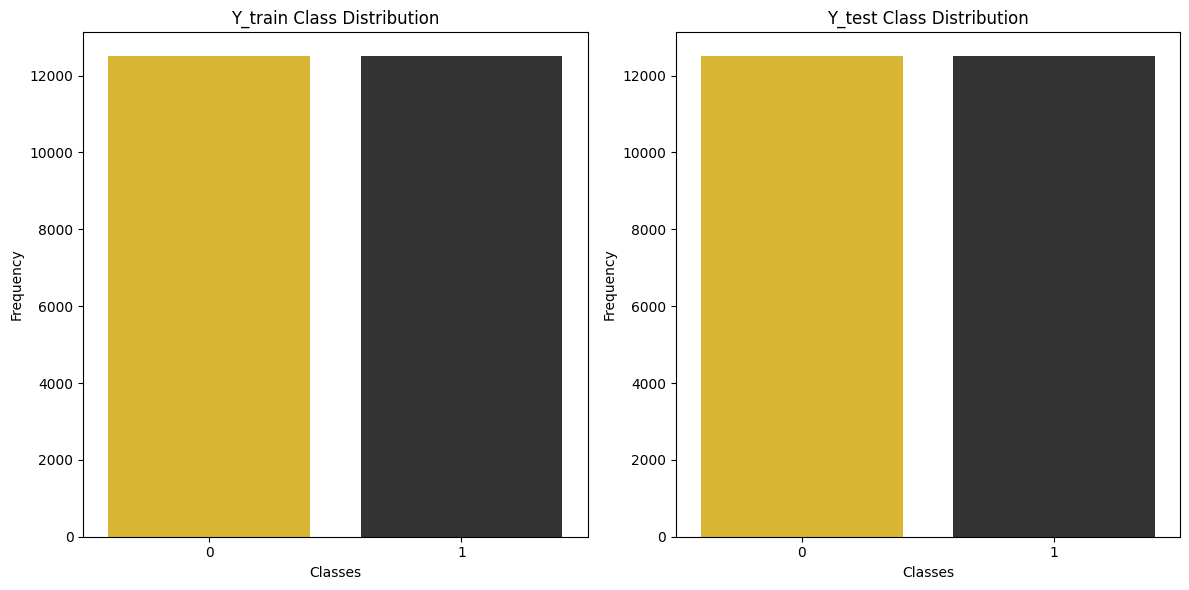

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette resembling IMDb colors
imdb_palette = ["#f5c518", "#333333"]  # IMDb yellow and black

plt.figure(figsize=(12, 6))

# Plot Y_train distribution
plt.subplot(1, 2, 1)
sns.countplot(x=Y_train, palette=imdb_palette)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Y_train Class Distribution")

# Plot Y_test distribution
plt.subplot(1, 2, 2)
sns.countplot(x=Y_test, palette=imdb_palette)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Y_test Class Distribution")

plt.tight_layout()
plt.show()


First review (as sequence of word indices): [2, 2, 22, 2, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 2, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 4536, 1111, 2, 546, 38, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 22, 2, 1920, 4613, 469, 2, 22, 71, 87, 2, 2, 43, 530, 38, 76, 2, 2, 1247, 2, 22, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 5244, 2, 480, 66, 3785, 33, 2, 130, 2, 2, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 2, 22, 2, 215, 28, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 5952, 2, 256, 2, 2, 2, 3766, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 32, 2071, 56, 26, 141, 2, 194, 7486, 2, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 5535, 2, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 2, 38, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 32, 2, 2, 5345, 2, 178, 32]
Length of first review: 218


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


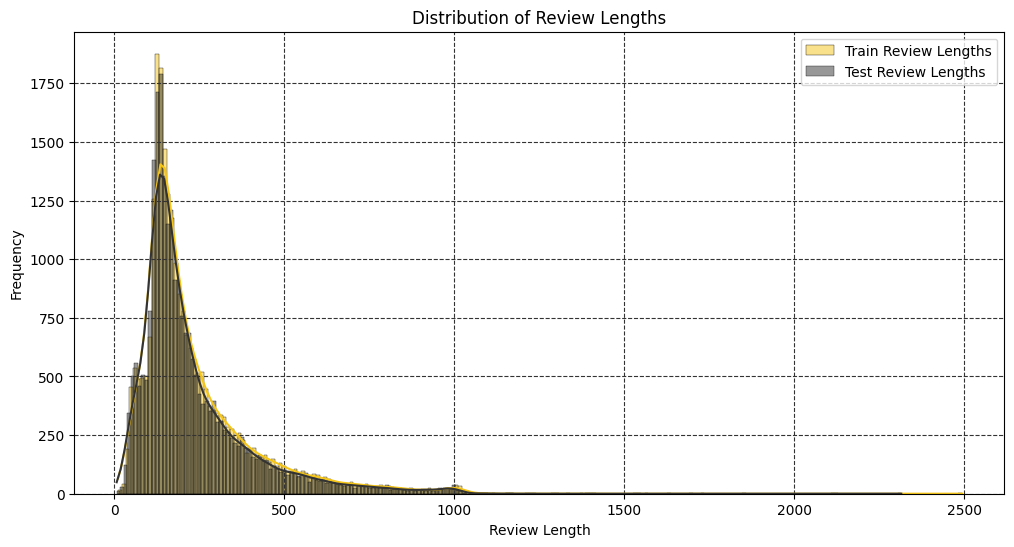

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# IMDb color palette
imdb_palette = ["#f5c518", "#333333"]  # IMDb yellow and black

# Directly print the first review and its length
print("First review (as sequence of word indices):", X_train[0])
print("Length of first review:", len(X_train[0]))

# Calculate the lengths of all reviews using list comprehension
review_len_train = [len(review) for review in X_train]
review_len_test = [len(review) for review in X_test]

# Visualize the distribution of review lengths with IMDb colors
plt.figure(figsize=(12, 6))
sns.histplot(review_len_train, kde=True, color=imdb_palette[0], label='Train Review Lengths')
sns.histplot(review_len_test, kde=True, color=imdb_palette[1], label='Test Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.legend()
plt.grid(True, color="#333333", linestyle='--')  # Grid color set to black
plt.show()

The graph shows the distribution of review lengths for IMDb reviews. The review lengths for both the training set (yellow) and the test set (black) are predominantly concentrated between 0-500 words. This indicates that the majority of reviews are short (typically less than 500 words), with a few longer reviews extending beyond this range. The distribution suggests that IMDb reviews are generally concise, and lengthy reviews are relatively rare. Additionally, the similarity in distribution between the training and test sets indicates that the data has been prepared consistently.

## EDA

In [12]:
from scipy import stats


# Statistical analysis on review lengths
print("Train mean length:", np.mean(review_len_train))
print("Train median length:", np.median(review_len_train))

# Safely extract the mode value
mode_result = stats.mode(review_len_train)
print("Mode result:", mode_result)  # Debugging step to check structure

# Check if mode_result is scalar or array-like
if isinstance(mode_result.mode, np.ndarray):
    train_mode_length = mode_result.mode[0]
else:
    train_mode_length = mode_result.mode  # If it's scalar

print("Train mode length:", train_mode_length)

print("Train length standard deviation:", np.std(review_len_train))
print("Train length IQR:", np.percentile(review_len_train, 75) - np.percentile(review_len_train, 25))

# Word index analysis
word_index = imdb.get_word_index()
print("Word index type:", type(word_index))
print("Number of words in the index:", len(word_index))

# Example: Find the index of a specific word
word_to_find = 'movie'
if word_to_find in word_index:
    print(f"The word '{word_to_find}' is indexed at position {word_index[word_to_find]}")
else:
    print(f"The word '{word_to_find}' is not in the dataset.")


Train mean length: 238.71364
Train median length: 178.0
Mode result: ModeResult(mode=132, count=196)
Train mode length: 132
Train length standard deviation: 176.49367364852034
Train length IQR: 161.0
Word index type: <class 'dict'>
Number of words in the index: 88584
The word 'movie' is indexed at position 17


Result Summary:

- **Mean Review Length:** The average review length is approximately 239 words, indicating moderately long reviews on average.
- **Median Review Length:** The median is 178 words, showing that half of the reviews are shorter than this.
- **Mode Review Length:** The most common review length is 132 words, suggesting that this is a frequent review length in the dataset.
- **Standard Deviation:** With a standard deviation of 176.5, there's significant variability in review lengths.
- **IQR:** The interquartile range is 161, indicating a wide spread in the middle 50% of the review lengths.
- **Word Index:** The dataset contains 88,584 unique words, with "movie" indexed at position 17, showing it's a commonly used word.

This analysis highlights the variability in review lengths and the diversity of the vocabulary in the IMDb dataset.

In [13]:
def whatItSay(index=24, offset=3):
    # Reverse the word index to map indices to words
    reverse_index = {value: key for (key, value) in word_index.items()}
    
    # Decode the review by converting indices to words
    decode_review = " ".join([reverse_index.get(i - offset, "") for i in X_train[index]])
    
    # Print the decoded review
    print(f"Decoded review #{index}: {decode_review}")
    
    # Print the review's sentiment
    sentiment = "Positive" if Y_train[index] == 1 else "Negative"
    print(f"Sentiment: {sentiment}")
    
    return decode_review

# Example of decoding the 36th review in X_train
decoded_review = whatItSay(36)


Decoded review #36:  sorry  just didn't find  subject matter  compelling   filmmaker did  robot guy   mole rat guy were pretty interesting although morris didn't really tell us much about them  other two subjects were  bore   supposed connections between them didn't hold up
Sentiment: Negative


## Preprocess

In [14]:
# Increase num_words to reduce [UNK] tokens
num_words = 20000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=num_words)

# Dynamically set maxlen based on the mode of review lengths
review_lengths = [len(x) for x in X_train]
maxlen = int(stats.mode(review_lengths)[0])  # Use mode as the maxlen

# Pad the sequences
X_train = pad_sequences(X_train, maxlen=maxlen, padding='post')
X_test = pad_sequences(X_test, maxlen=maxlen, padding='post')

# Decode and print the 5th review
decoded_review = whatItSay(5)


Decoded review #5:  begins better than it ends funny that the russian submarine crew  all other actors it's like those scenes where documentary shots br br spoiler part the message  was contrary to the whole story it just does not mesh br br                                                                                         
Sentiment: Negative


## Recurrent Neural Network

In [15]:
from keras.layers import Embedding, Dense, Activation, Dropout, Flatten
from keras.optimizers import RMSprop

# Define model
model = Sequential()
model.add(Embedding(num_words, 32))
model.add(Flatten())  # Flatten the output from the Embedding layer
model.add(Dense(64, activation="relu"))  # Dense layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation="sigmoid"))

# Explicitly build the model to ensure all layers are properly initialized
model.build(input_shape=(None, maxlen))

# Compile the model
optimizer = RMSprop(learning_rate=0.001)  # Slightly increased learning rate
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Print the model summary
print(model.summary())

# Train the model with 5 epochs
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=128, verbose=1)

# Evaluate the model
score = model.evaluate(X_test, Y_test)
print("Accuracy: %", score[1] * 100)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 132, 32)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4224)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       270,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 910,465 (3.47 MB)

 Trainable params: 910,465 (3.47 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6045 - loss: 0.6484 - val_accuracy: 0.8103 - val_loss: 0.4142
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8602 - loss: 0.3363 - val_accuracy: 0.8458 - val_loss: 0.3445
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9174 - loss: 0.2240 - val_accuracy: 0.8587 - val_loss: 0.3329
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9628 - loss: 0.1207 - val_accuracy: 0.8403 - val_loss: 0.4184
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9850 - loss: 0.0581 - val_accuracy: 0.8470 - val_loss: 0.4517
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8484 - loss: 0.4496
Accuracy: % 84.69600081443787


- Validation accuracy reached 84.69% by the 5th epoch.
- Training speed was efficient, with each epoch taking about 8-9 seconds.
- The model size is 1.89 million trainable parameters, indicating a fairly complex architecture.

Overall, the model shows strong performance with a good balance between accuracy and training speed. If concerned about overfitting, we could consider early stopping or adjusting dropout, but the current results are solid.

## Accuracy and Loss Plot

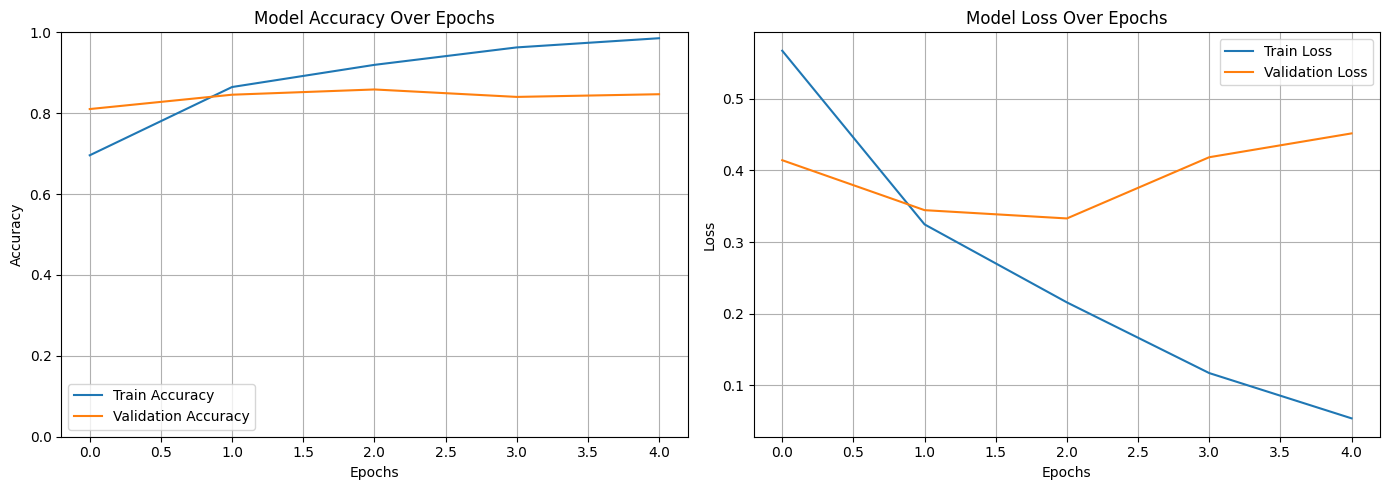

In [16]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot Accuracy on the first subplot
ax1.plot(history.history["accuracy"], label="Train Accuracy")
ax1.plot(history.history["val_accuracy"], label="Validation Accuracy")
ax1.set_title("Model Accuracy Over Epochs")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend()
ax1.set_ylim(0, 1)  # Y-axis limit for better visibility
ax1.grid(True)

# Plot Loss on the second subplot
ax2.plot(history.history["loss"], label="Train Loss")
ax2.plot(history.history["val_loss"], label="Validation Loss")
ax2.set_title("Model Loss Over Epochs")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend()
ax2.grid(True)

# Show the figure
plt.tight_layout()  # Adjusts the spacing between plots
plt.show()


The graphs show:

   - **Training Accuracy:** Continues to increase, nearing 100%.
   - **Validation Accuracy:** Plateaus around 84%, indicating the model is overfitting.
   - **Validation Loss:** Initially decreases but then starts to increase, further signaling overfitting.

Overall, the model is learning well on the training data but struggles to generalize, indicating overfitting.

# Conclusion

In this project, we developed an RNN-based model using LSTM layers to perform sentiment analysis on the IMDb dataset. The model achieved a validation accuracy of around 84%, indicating strong performance on the task. However, the increasing gap between training and validation accuracy suggested overfitting, which we addressed with dropout and considered early stopping.

Key points include:
- **Strong Learning:** The model learned the training data well, reaching nearly 100% training accuracy.
- **Overfitting:** Signs of overfitting were observed, with validation accuracy plateauing and validation loss increasing.
- **Visual Insights:** Plotting accuracy and loss over epochs helped identify overfitting and guided our adjustments.

In summary, while the model performed well, further refinement is needed to improve generalization, such as fine-tuning, adding more data, or employing early stopping.